In [31]:
!python --version
#!pip install pandas-datareader
#!pip install yfinance
#!pip install matplotlib
#!pip install seaborn 
#!pip install nsepy

Python 3.9.5
     |████████████████████████████████| 285 kB 2.1 MB/s eta 0:00:01


### Let's load the ticker data for 5 differet market segments and NIFTY50
- Banking
- Realty
- IT
- Pharma
- FMCG

In [2]:
#!python3 -m pip install pandas_datareader

In [3]:
a = [1,2,3,4,5]
print(a[0])

1


In [3]:
import datetime as dtime
import nsepy
from nsepy import get_history as gh
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import numpy as np
import seaborn as sn
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import pandas as pd

In [14]:
ticker_list = ['Nifty 50','Nifty Bank','Nifty Auto','Nifty IT','NIFTY REALTY']

In [4]:
def getNSEData(start,end, ticker):
    nsepy.urls.index_history_url.url
    stk_data = gh(symbol=ticker,start=start,end=end, index=True)
    stk_data.reset_index(inplace=True)
    return stk_data
    

    
def writeData(data,writedir,filename):
    data.to_csv(writedir+'/'+filename +'.csv',index=False)

In [5]:
start = dtime.datetime(2019,12,1)
enddate = today + timedelta(days=-1)
end = dtime.datetime(enddate.year, enddate.month, enddate.day)
for tick in ticker_list:
    stk_data = getNSEData(start,end,tick)
    writeData(stk_data,'./nse_ticker_data/',tick+'_'+str(date.today()))

NameError: name 'today' is not defined

In [7]:
nsedf = pd.read_csv('./nse_ticker_data/Nifty 50_2021-08-01.csv', index_col=None, header=0)
nseauto = pd.read_csv('./nse_ticker_data/Nifty Auto_2021-08-01.csv', index_col=None, header=0)
nsebankdf = pd.read_csv('./nse_ticker_data/Nifty Bank_2021-08-01.csv', index_col=None, header=0)

nseitdf = pd.read_csv('./nse_ticker_data/Nifty IT_2021-08-01.csv', index_col=None, header=0)



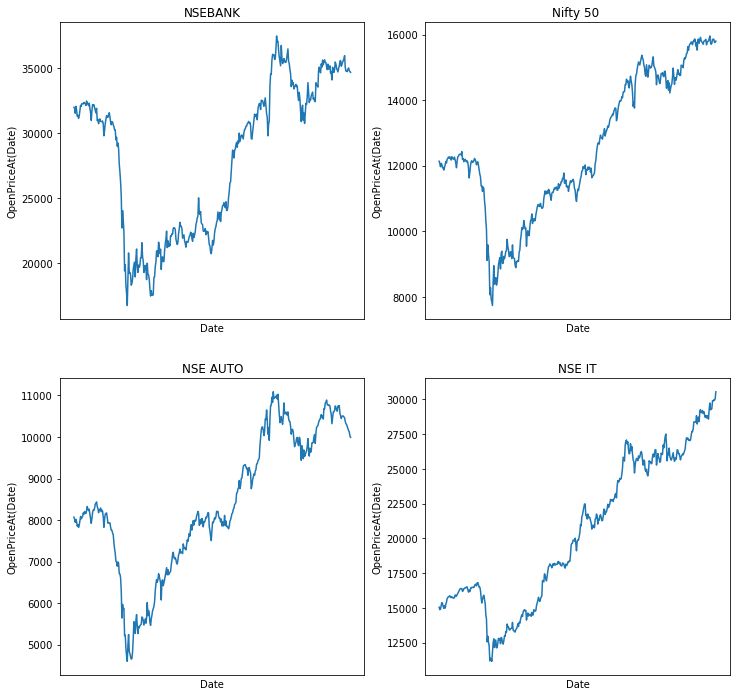

In [9]:
import matplotlib.dates as mdates
figure, axis = plt.subplots(2, 2,figsize=(12,12))

axis[0][0].plot(nsebankdf['Date'],nsebankdf['Open'])
axis[0][0].set_title('NSEBANK')
#plt.title('NIFTY50 Autocorrelation plot with lag= 1')
axis[0][0].set_xlabel('Date')
axis[0][0].set_ylabel('OpenPriceAt(Date)')
axis[0][0].xaxis.set_major_locator(mdates.DayLocator((1,15)))
axis[0][0].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


axis[0][1].plot(nsedf['Date'],nsedf['Open'])
axis[0][1].set_title('Nifty 50 ')
#plt.title('NIFTY50 Autocorrelation plot with lag= 1')
axis[0][1].set_xlabel('Date')
axis[0][1].set_ylabel('OpenPriceAt(Date)')
axis[0][1].xaxis.set_major_locator(mdates.DayLocator((1,15)))
axis[0][1].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


axis[1][0].plot(nseauto['Date'],nseauto['Open'])
axis[1][0].set_title('NSE AUTO')
#plt.title('NIFTY50 Autocorrelation plot with lag= 1')
axis[1][0].set_xlabel('Date')
axis[1][0].set_ylabel('OpenPriceAt(Date)')
axis[1][0].xaxis.set_major_locator(mdates.DayLocator((1,15)))
axis[1][0].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


axis[1][1].plot(nseitdf['Date'],nseitdf['Open'])
axis[1][1].set_title('NSE IT')
#plt.title('NIFTY50 Autocorrelation plot with lag= 1')
axis[1][1].set_xlabel('Date')
axis[1][1].set_ylabel('OpenPriceAt(Date)')
axis[1][1].xaxis.set_major_locator(mdates.DayLocator((1,15)))
axis[1][1].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')



#figure.autofmt_xdate()


In [10]:



yf.pdr_override()

# Tickers list
# We can add and delete any ticker from the list to get desired ticker live data
#ticker_list=['ONGC.NS','COALINDIA.NS','GRASIM.NS','DIVISLAB.NS','IOC.NS','SUNPHARMA.NS','DRREDDY.NS','BPCL.NS','WIPRO.NS','CIPLA.NS','SBILIFE.NS','POWERGRID.NS','BAJAJ-AUTO.NS','TATACONSUM.NS','INDUSINDBK.NS','TATASTEEL.NS','INFY.NS','NTPC.NS','BAJFINANCE.NS','BRITANNIA.NS','ITC.NS','BHARTIARTL.NS','HCLTECH.NS','AXISBANK.NS','NESTLEIND.NS','TITAN.NS','LT.NS','RELIANCE.NS','BAJAJFINSV.NS','HEROMOTOCO.NS','UPL.NS','HDFCLIFE.NS','EICHERMOT.NS','JSWSTEEL.NS','TECHM.NS','SHREECEM.NS','MARUTI.NS','SBIN.NS','ULTRACEMCO.NS','HINDALCO.NS','HINDUNILVR.NS','TCS.NS','ADANIPORTS.NS','M&M.NS','TATAMOTORS.NS','ASIANPAINT.NS','KOTAKBANK.NS','ICICIBANK.NS','HDFCBANK.NS','HDFC.NS']
ticker_list = ['^NSEBANK','^CNXREALTY','^CNXIT','^CNXPHARMA','^CNXFMCG','^NSEI']
today = date.today()
# We can get data by our choice by giving days bracket
start_date= '2019–10–01'
end_date="2021–05-02"
files=[]
outdir = './ticker_data'
covid_outdir = './covid_case_data'
if not os.path.exists(outdir):
    os.mkdir(outdir)
if not os.path.exists(covid_outdir):
    os.mkdir(covid_outdir)
from datetime import date, timedelta
def get_historic_dates(start_n_days,end_n_days):
    for n in range(start_n_days,end_n_days):
        yield today  + timedelta(days=-n)

def read_n_files(n,from_dir):
    all_files = glob.glob(from_dir + "/*.csv")
    ll = []
    if(len(all_files) > n):
        print('More files') 
        for i in range(0,n):
           
            df = pd.read_csv(all_files[i], index_col=None, header=0)
            ll.append(df)
    else:
        print('Less files')
        for filename in all_files:
            
            df = pd.read_csv(filename, index_col=None, header=0)
            ll.append(df)
    df1 = pd.concat(ll, axis=0, ignore_index=True)
    print(df1.head())
    
    return df1
    
#read_n_files(7,outdir)

In [5]:
from datetime import date, timedelta
today = date.today()

In [ ]:
data = pdr.get_data_yahoo('^NSEBANK', start=(today + timedelta(days=-100)), end=today + timedelta(days=-2))
data = data.reset_index()
data.head()

In [23]:


def getData(ticker):
    print(ticker)
    data = pdr.get_data_yahoo(ticker, start=(today + timedelta(days=-550)), end=today + timedelta(days=-1))
    data =  data.reset_index()
    dataname = ticker +'_'+str(today)
    files.append(dataname)
    SaveData(data,outdir, dataname)


# Create a data folder in your current dir.
def SaveData(df,writedir, filename):
    df.to_csv(writedir+'/'+filename +'.csv',index=False)



In [24]:
# This loop will iterate over ticker list, will pass one ticker to get data, and save that data as file.
for tik in ticker_list:
    getData(tik)

^NSEBANK
[*********************100%***********************]  1 of 1 completed
^CNXREALTY
[*********************100%***********************]  1 of 1 completed
^CNXIT
[*********************100%***********************]  1 of 1 completed
^CNXPHARMA
[*********************100%***********************]  1 of 1 completed
^CNXFMCG
[*********************100%***********************]  1 of 1 completed
^NSEI
[*********************100%***********************]  1 of 1 completed


### Let's now load the covid cases data for India

In [9]:
header =  ['FIPS','Admin2','Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Deaths','Recovered','Active','Combined_Key']

filen = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-21-2020.csv'

df = pd.read_csv(filen)

#df.col
df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-21T10:13:08,67800,3139,58946,30.9756,112.2707
1,NaN,Italy,2020-03-21T17:43:03,53578,4825,6072,41.8719,12.5674
2,NaN,Spain,2020-03-21T13:13:30,25374,1375,2125,40.4637,-3.7492
3,NaN,Germany,2020-03-21T20:43:02,22213,84,233,51.1657,10.4515
4,NaN,Iran,2020-03-21T11:13:12,20610,1556,7635,32.4279,53.6880


In [10]:
from datetime import timedelta,date
today = date.today()
# Build the github data url for a date string
def build_covid_filename(datestr):
    return 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+datestr+'.csv'

import pandas as pd

allCovidDFs = []
allCovidUniqColNames = set()
# Next step does 3 things:
#   1) Loop historic 500 days
#   2) Build the url for each date
#   3) Fetch the raw data from urls fabricated.
for d in get_historic_dates(2,500):
    datestr = d.strftime('%m-%d-%Y')
    filename = build_covid_filename(datestr)
    df = pd.read_csv(filename)
    allCovidDFs.append(df)
        
    allCovidUniqColNames.update(set(df.columns))
    #df = pd.read_csv(filename,header=[1])
    cols = df.columns
    print(cols)
    
            
    if 'Country_Region' in cols:
        print('In country_regions')
        f = df[df['Country_Region']=='India']
    else:
        print('In country/regions')
        f = df[df['Country/Region']=='India']
        f['Country_Region'] = f['Country/Region']
        f.drop(['Country/Region'],inplace=True,axis=1)
        
        
    if 'Province/State' in cols:
        f['Province_State'] = f['Province/State']
        f.drop(['Province/State'],inplace=True,axis=1)
    
    if 'Case-Fatality_Ratio' in cols:
        f['Case_Fatality_Ratio'] = f['Case-Fatality_Ratio']
        f.drop(['Case-Fatality_Ratio'],inplace=True,axis=1)
    
    if 'Incidence_Rate' in cols:
        f['Incident_Rate'] = f['Incidence_Rate']
        f.drop(['Incidence_Rate'],inplace=True,axis=1)
    
    if ( ('Incident_Rate' not in cols) and ('Incidence_Rate' not in cols)) :
        f['Incident_Rate'] = 0
        
    if (('Case-Fatality_Ratio' not in cols) and ('Case_Fatality_Ratio' not in cols)) :
        f['Case_Fatality_Ratio'] = 0
        
    f = f[['Country_Region','Province_State','Incident_Rate','Case_Fatality_Ratio','Deaths','Recovered', 'Confirmed']]
        
    f['record_date'] = d
    SaveData(f,covid_outdir,datestr)

    
print(allCovidUniqColNames)

07-16-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-16-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
07-15-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-15-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
07-14-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-14-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'La

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
06-24-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-24-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
06-23-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-23-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
06-02-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-02-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
06-01-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-01-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
05-11-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-11-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
05-10-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-10-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
04-19-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-19-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
04-18-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-18-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
03-28-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-28-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
03-27-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-27-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
03-06-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-06-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
03-05-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-05-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
02-12-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-12-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
02-11-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-11-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
01-21-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-21-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
01-20-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-20-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
12-30-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-30-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
12-29-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-29-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
12-08-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-08-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
12-07-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-07-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
11-16-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-16-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
11-15-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-15-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

/home/amit/anaconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/amit/anaconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
11-06-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-06-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
11-05-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-05-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
10-15-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-15-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
10-14-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-14-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
09-23-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-23-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
09-22-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-22-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
09-01-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-01-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
08-31-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-31-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
08-10-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-10-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
08-09-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-09-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
07-19-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-19-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
07-18-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-18-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
06-27-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-27-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
06-26-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-26-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
06-05-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-05-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
06-04-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-04-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
05-13-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-13-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
05-12-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-12-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
05-11-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
04-19-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-19-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
04-18-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-18-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
04-17-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
03-26-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-26-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
03-25-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-25-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
03-24-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data

In [49]:
nsebankdf = pd.read_csv('./ticker_data/^NSEBANK_2021-07-18.csv')
#nsebankdf.head()
nsedf = pd.read_csv('./ticker_data/^NSEI_2021-07-18.csv')
#nsedf.head()
cnxitdf = pd.read_csv('./ticker_data/^CNXIT_2021-07-18.csv')
cnxitdf.head()
realtydf = pd.read_csv('./ticker_data/^CNXREALTY_2021-07-18.csv')
realtydf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-16,395.450012,402.100006,390.049988,397.549988,397.549988,0


#### Let's test the linearity in the price

Text(0, 0.5, 'OpenPriceAt(t+2)')

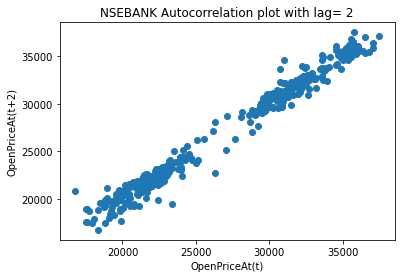

In [16]:
plt.figure()
lag_plot(df['Open'],lag=2)
plt.title('NSEBANK Autocorrelation plot with lag= 2')
#plt.title('NIFTY50 Autocorrelation plot with lag= 1')
plt.xlabel('OpenPriceAt(t)')
plt.ylabel('OpenPriceAt(t+2)')

Text(0, 0.5, 'OpenPriceAt(t+2)')

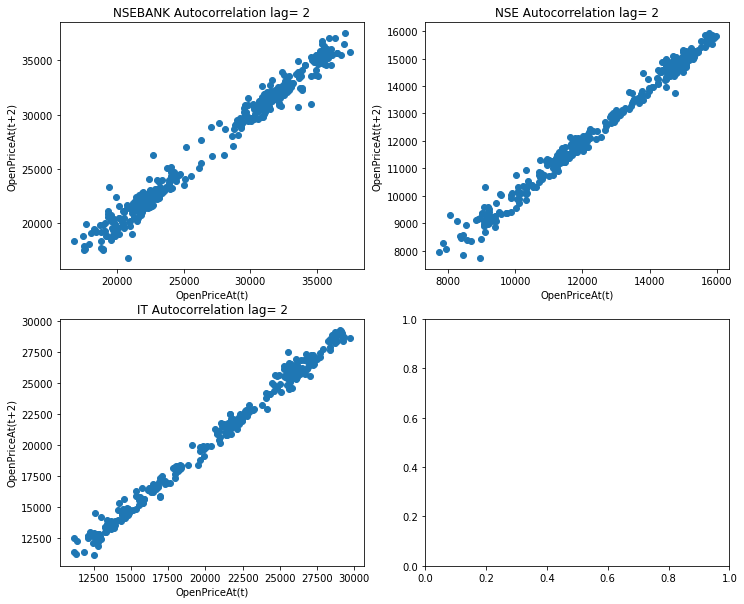

In [48]:
figure, axis = plt.subplots(2, 2,figsize=(12,10))

axis[0][0].scatter(nsebankdf['Open'],nsebankdf['Open'].shift(2))
axis[0][0].set_title('NSEBANK Autocorrelation lag= 2')
#plt.title('NIFTY50 Autocorrelation plot with lag= 1')
axis[0][0].set_xlabel('OpenPriceAt(t)')
axis[0][0].set_ylabel('OpenPriceAt(t+2)')

axis[0][1].scatter(nsedf['Open'],nsedf['Open'].shift(2))
axis[0][1].set_title('NSE Autocorrelation lag= 2')
#plt.title('NIFTY50 Autocorrelation plot with lag= 1')
axis[0][1].set_xlabel('OpenPriceAt(t)')
axis[0][1].set_ylabel('OpenPriceAt(t+2)')


axis[1][0].scatter(cnxitdf['Open'],cnxitdf['Open'].shift(2))
axis[1][0].set_title('IT Autocorrelation lag= 2')
#plt.title('NIFTY50 Autocorrelation plot with lag= 1')
axis[1][0].set_xlabel('OpenPriceAt(t)')
axis[1][0].set_ylabel('OpenPriceAt(t+2)')


In [14]:
len(df['Close'])

403

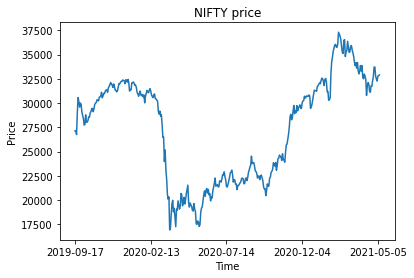

In [15]:
plt.plot(df['Date'],df['Close'])
plt.xticks(np.arange(0,500,100),df['Date'][0:500:100])
plt.title('NIFTY price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [16]:
covid_df = read_n_files(500,covid_outdir)
covid_df.head()

More files
  Country_Region  Incident_Rate Case_Fatality_Ratio   Deaths  Recovered  \
0          India    1658.609808            1.575828    109.0     6591.0   
1          India    3049.078933            0.640744  10531.0  1446244.0   
2          India    1644.106369            0.422153    109.0    22019.0   
3          India    1102.517960            0.786603   3088.0   334418.0   
4          India     561.616519            0.705239   4943.0   667506.0   

   Confirmed record_date  Unnamed: 0  
0       6917  2021-05-27         NaN  
1    1643557  2021-05-27         NaN  
2      25820  2021-05-27         NaN  
3     392574  2021-05-27         NaN  
4     700897  2021-05-27         NaN  


,Country_Region,Incident_Rate,Case_Fatality_Ratio,Deaths,Recovered,Confirmed,record_date,Unnamed: 0
0,India,1658.609808,1.575828,109.0,6591.0,6917,2021-05-27,NaN
1,India,3049.078933,0.640744,10531.0,1446244.0,1643557,2021-05-27,NaN
2,India,1644.106369,0.422153,109.0,22019.0,25820,2021-05-27,NaN
3,India,1102.517960,0.786603,3088.0,334418.0,392574,2021-05-27,NaN
4,India,561.616519,0.705239,4943.0,667506.0,700897,2021-05-27,NaN


In [22]:
covid_df.columns

Index(['Unnamed: 0', 'Country_Region', 'Incident_Rate', 'Case_Fatality_Ratio',
       'Deaths', 'Recovered', 'Confirmed', 'record_date'],
      dtype='object')

In [23]:
covid_sum = covid_df.groupby(['record_date']).sum().reset_index()

In [24]:
covid_sum.head(150)

,record_date,Unnamed: 0,Incident_Rate,Deaths,Recovered,Confirmed
0,2020-02-01,54,0.000000,0.0,0.0,1
1,2020-02-02,47,0.000000,0.0,0.0,2
2,2020-02-03,45,0.000000,0.0,0.0,3
3,2020-02-04,45,0.000000,0.0,0.0,3
4,2020-02-05,45,0.000000,0.0,0.0,3
...,...,...,...,...,...,...
145,2020-06-25,120580,1614.381385,15301.0,285637.0,490401
146,2020-06-26,120616,1667.250626,15685.0,295881.0,508953
147,2020-06-27,120652,1731.077617,16095.0,309713.0,528859
148,2020-06-28,120652,1782.501092,16475.0,321723.0,548318


In [25]:
covid_sum.drop(['Unnamed: 0'],axis=1,inplace=True)

In [26]:
covid_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   record_date    468 non-null    object 
 1   Incident_Rate  468 non-null    float64
 2   Deaths         468 non-null    float64
 3   Recovered      468 non-null    float64
 4   Confirmed      468 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 18.4+ KB


In [28]:
!mkdir clean_covid

In [31]:
SaveData(covid_sum,'./clean_covid','clean_covid')

In [11]:
covid_df = pd.read_csv('./clean_covid/clean_covid.csv', index_col=None, header=0)
covid_df.head()

,record_date,Incident_Rate,Deaths,Recovered,Confirmed
0,2020-02-01,0.0,0.0,0.0,1
1,2020-02-02,0.0,0.0,0.0,2
2,2020-02-03,0.0,0.0,0.0,3
3,2020-02-05,0.0,0.0,0.0,3
4,2020-02-06,0.0,0.0,0.0,3


In [12]:
stock_df = pd.read_csv('./nse_ticker_data/Nifty 50_2021-08-01.csv', index_col=None, header=0)
stock_df.head()

,Date,Open,High,Low,Close,Volume,Turnover
0,2019-12-02,12137.05,12137.15,12023.70,12048.2,720945335,2.311318e+11
1,2019-12-03,12067.65,12068.60,11956.40,11994.2,605789334,1.820376e+11
2,2019-12-04,11969.95,12054.70,11935.30,12043.2,747193818,2.213283e+11
3,2019-12-05,12071.25,12081.20,11998.75,12018.4,562228745,1.958981e+11
4,2019-12-06,12047.35,12057.05,11888.85,11921.5,609221205,1.824549e+11


In [13]:
#stock_df = pd.read_csv('./ticker_data/^NSEI_2021-07-18.csv', index_col=None, header=0)
#stock_df.head()

In [46]:
covid_df.count

<bound method DataFrame.count of     record_date  Incident_Rate    Deaths   Recovered  Confirmed
0    2020-02-01       0.000000       0.0         0.0          1
1    2020-02-02       0.000000       0.0         0.0          2
2    2020-02-03       0.000000       0.0         0.0          3
3    2020-02-05       0.000000       0.0         0.0          3
4    2020-02-06       0.000000       0.0         0.0          3
..          ...            ...       ...         ...        ...
495  2021-07-04  124415.063028  402728.0  29700430.0   30585229
496  2021-07-05  124677.890921  403281.0  29752294.0   30619932
497  2021-07-06  124938.772443  404211.0  29799534.0   30663665
498  2021-07-07  125228.198898  405028.0  29843825.0   30709557
499  2021-07-08  125504.673739  405939.0  29888284.0   30752950

[500 rows x 5 columns]>

In [68]:
data = pd.merge(stock_df,covid_df,left_on='Date',right_on='record_date',how='inner')
data.head(50)

,Date,Open,High,Low,Close,Volume,Turnover,record_date,Incident_Rate,Deaths,Recovered,Confirmed
0,2020-02-01,11939.00,12017.35,11633.30,11661.85,537634767,2.059812e+11,2020-02-01,0.0,0.0,0.0,1
1,2020-02-03,11627.45,11749.85,11614.50,11707.90,669815788,2.541526e+11,2020-02-03,0.0,0.0,0.0,3
2,2020-02-05,12005.85,12098.15,11953.35,12089.15,758032580,2.299805e+11,2020-02-05,0.0,0.0,0.0,3
3,2020-02-06,12120.00,12160.60,12084.65,12137.95,565116236,2.173592e+11,2020-02-06,0.0,0.0,0.0,3
4,2020-02-07,12151.15,12154.70,12073.95,12098.35,473475144,1.633961e+11,2020-02-07,0.0,0.0,0.0,3
5,2020-02-10,12102.35,12103.55,11990.75,12031.50,525674715,1.718514e+11,2020-02-10,0.0,0.0,0.0,3
6,2020-02-11,12108.40,12172.30,12099.00,12107.90,480491557,1.620952e+11,2020-02-11,0.0,0.0,0.0,3
7,2020-02-12,12151.00,12231.75,12144.30,12201.20,412399174,1.659833e+11,2020-02-12,0.0,0.0,0.0,3
8,2020-02-13,12219.55,12225.65,12139.80,12174.65,501510138,1.631527e+11,2020-02-13,0.0,0.0,0.0,3
9,2020-02-14,12190.15,12246.70,12091.20,12113.45,623053270,2.075951e+11,2020-02-14,0.0,0.0,0.0,3


In [69]:
data.fillna(0.0)

,Date,Open,High,Low,Close,Volume,Turnover,record_date,Incident_Rate,Deaths,Recovered,Confirmed
0,2020-02-01,11939.00,12017.35,11633.30,11661.85,537634767,2.059812e+11,2020-02-01,0.000000,0.0,0.0,1
1,2020-02-03,11627.45,11749.85,11614.50,11707.90,669815788,2.541526e+11,2020-02-03,0.000000,0.0,0.0,3
2,2020-02-05,12005.85,12098.15,11953.35,12089.15,758032580,2.299805e+11,2020-02-05,0.000000,0.0,0.0,3
3,2020-02-06,12120.00,12160.60,12084.65,12137.95,565116236,2.173592e+11,2020-02-06,0.000000,0.0,0.0,3
4,2020-02-07,12151.15,12154.70,12073.95,12098.35,473475144,1.633961e+11,2020-02-07,0.000000,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
334,2021-07-02,15705.85,15738.35,15635.95,15722.20,254808999,1.801542e+11,2021-07-02,123911.048197,401050.0,29605779.0,30502362
335,2021-07-05,15793.40,15845.95,15762.05,15834.35,207032153,1.497654e+11,2021-07-05,124677.890921,403281.0,29752294.0,30619932
336,2021-07-06,15813.75,15914.20,15801.00,15818.25,391410742,2.445605e+11,2021-07-06,124938.772443,404211.0,29799534.0,30663665
337,2021-07-07,15819.60,15893.55,15779.70,15879.65,329308646,2.225996e+11,2021-07-07,125228.198898,405028.0,29843825.0,30709557


In [70]:
corr = data.corr()

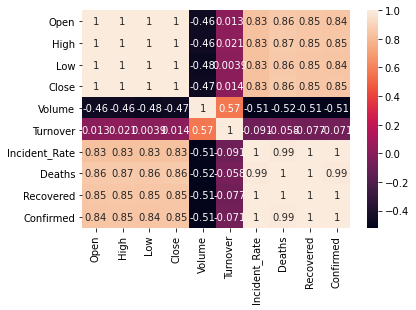

In [71]:
sn.heatmap(corr, annot=True)

In [72]:
data_2 = data[['Close','Deaths','Confirmed']]


In [73]:
train_set =  data_2.values
train_set.shape


(339, 3)

In [74]:
train_set.shape[0]

339

In [75]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)

print(training_set_scaled[0])

[0.4899509 0.        0.       ]


In [76]:
X_train = []
y_train = []
type(X_train)
for i in range(15, train_set.shape[0]):
    X_train.append(training_set_scaled[i-15:i])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
#np.expand_dims(X_train,)
print(X_train.shape)
#X_train = np.reshape(X_train, (X_train.shape[1], X_train.shape[2], 1))
    

X_train[0]
y_train[0]

(324, 15, 3)


0.5064031247732603

In [121]:
X_train.shape[0]-80

244

In [ ]:
X_test = X_train[X_train.shape[0]-80:]
X_train_n = X_train[:X_train.shape[0]-80]
y_test = y_train[X_train.shape[0]-80:]
y_train_n = y_train[:X_train.shape[0]-80]

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True,input_shape = (X_train_n.shape[1],X_train_n.shape[2])))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=["mae","accuracy"])
regressor.fit(X_train_n, y_train_n,validation_data=(X_test, y_test), epochs = 15, batch_size = 11)

In [ ]:
hist = pd.DataFrame(regressor.history.history)
hist['epoch'] = regressor.history.epoch
hist.tail()

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['mae'], label='mae')
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(history.history['val_mae'], label='val_mae')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [ ]:
plot_loss(regressor.history)

In [ ]:
plt.semilogx( regressor.history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [ ]:
X_test.shape

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

In [ ]:
  plt.plot(y_pred.flatten(), label='y_pred')
  plt.plot(y_test, label='y_test')
  plt.legend()
  plt.grid(True)

In [ ]:
len(y_test)

In [ ]:
y_pred = y_pred.flatten()
y_pred - y_test

In [ ]:
res

In [123]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True,input_shape = (X_train_n.shape[1],X_train_n.shape[2])))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [124]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=["mae","accuracy"])
regressor.fit(X_train_n, y_train_n,validation_data=(X_test, y_test), epochs = 15, batch_size = 11)

Epoch 1/15
23/23 [==============================] - 4s 153ms/step - loss: 0.0715 - mae: 0.2006 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_mae: 0.0406 - val_accuracy: 0.0125
Epoch 2/15
23/23 [==============================] - 1s 33ms/step - loss: 0.0135 - mae: 0.0917 - accuracy: 0.0041 - val_loss: 0.0391 - val_mae: 0.1665 - val_accuracy: 0.0125
Epoch 3/15
23/23 [==============================] - 1s 35ms/step - loss: 0.0094 - mae: 0.0766 - accuracy: 0.0041 - val_loss: 0.0069 - val_mae: 0.0720 - val_accuracy: 0.0125
Epoch 4/15
23/23 [==============================] - 1s 32ms/step - loss: 0.0087 - mae: 0.0712 - accuracy: 0.0041 - val_loss: 0.0269 - val_mae: 0.1323 - val_accuracy: 0.0125
Epoch 5/15
23/23 [==============================] - 1s 34ms/step - loss: 0.0089 - mae: 0.0746 - accuracy: 0.0041 - val_loss: 0.0289 - val_mae: 0.1376 - val_accuracy: 0.0125
Epoch 6/15
23/23 [==============================] - 1s 33ms/step - loss: 0.0089 - mae: 0.0723 - accuracy: 0.0041 - val_loss: 0.030

In [125]:
hist = pd.DataFrame(regressor.history.history)
hist['epoch'] = regressor.history.epoch
hist.tail()

,loss,mae,accuracy,val_loss,val_mae,val_accuracy,epoch
10,0.007224,0.066385,0.004098,0.017966,0.101843,0.0125,10
11,0.006593,0.062555,0.004098,0.021222,0.111969,0.0125,11
12,0.006707,0.064390,0.004098,0.010485,0.076893,0.0125,12
13,0.008366,0.069959,0.004098,0.020207,0.113393,0.0125,13
14,0.007194,0.062972,0.004098,0.006924,0.064372,0.0125,14


In [126]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['mae'], label='mae')
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(history.history['val_mae'], label='val_mae')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

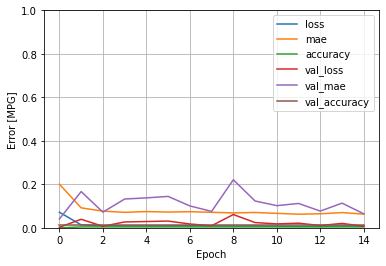

In [127]:
plot_loss(regressor.history)

(1e-08, 0.0001, 0.0, 60.0)

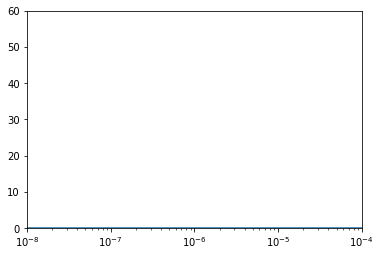

In [128]:
plt.semilogx( regressor.history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [120]:
X_test.shape

(4, 15, 3)

In [129]:
y_pred = regressor.predict(X_test)

In [130]:
y_pred

array([[0.8339356 ],
       [0.83221644],
       [0.8303739 ],
       [0.828836  ],
       [0.826968  ],
       [0.82555544],
       [0.82506955],
       [0.82536364],
       [0.8264804 ],
       [0.8288784 ],
       [0.8308682 ],
       [0.8313101 ],
       [0.8309427 ],
       [0.8325573 ],
       [0.8326267 ],
       [0.8316308 ],
       [0.82892513],
       [0.8267001 ],
       [0.8249431 ],
       [0.8230468 ],
       [0.8207512 ],
       [0.81851053],
       [0.81731045],
       [0.8169521 ],
       [0.8171568 ],
       [0.8186264 ],
       [0.820956  ],
       [0.82255256],
       [0.82422584],
       [0.825631  ],
       [0.82813144],
       [0.83140105],
       [0.83380926],
       [0.83495975],
       [0.8374915 ],
       [0.84022576],
       [0.8447331 ],
       [0.85000426],
       [0.8555978 ],
       [0.86181784],
       [0.86898655],
       [0.87869525],
       [0.88740486],
       [0.896509  ],
       [0.9066412 ],
       [0.91715556],
       [0.9270231 ],
       [0.935

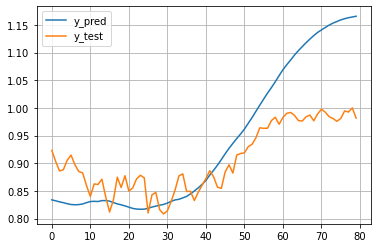

In [145]:
  plt.plot(y_pred.flatten(), label='y_pred')
  plt.plot(y_test, label='y_test')
  plt.legend()
  plt.grid(True)

In [137]:
len(y_test)

80

In [146]:
y_pred = y_pred.flatten()
y_pred - y_test

array([-8.93901368e-02, -7.11743727e-02, -5.57665864e-02, -5.94932383e-02,
       -7.85571750e-02, -8.92086262e-02, -7.22990653e-02, -5.97368549e-02,
       -5.63164285e-02, -3.10449291e-02, -9.28950523e-03, -3.13582985e-02,
       -3.08066506e-02, -3.86667102e-02, -6.50914984e-03,  1.96432574e-02,
       -5.11965889e-03, -4.81940968e-02, -3.12798172e-02, -5.45380273e-02,
       -2.90746738e-02, -3.68417302e-02, -5.44335677e-02, -6.14127055e-02,
       -5.64978870e-02,  8.34391657e-03, -2.20555931e-02, -2.48607935e-02,
        8.06022030e-03,  1.70898949e-02,  1.41546071e-02,  5.29474473e-05,
       -1.78607558e-02, -4.22864877e-02, -4.34248782e-02, -8.78989188e-03,
       -4.65135870e-03,  1.72654839e-02,  8.18443879e-03,  1.47125781e-03,
       -3.25327694e-03, -7.95916310e-03,  1.18274290e-02,  3.95846683e-02,
        5.19782109e-02,  3.28229641e-02,  2.97512430e-02,  5.36956174e-02,
        2.97763463e-02,  3.53786574e-02,  4.29494645e-02,  4.22638744e-02,
        4.82196031e-02,  

In [135]:
res

array([[ 0.08939014,  0.0694552 ,  0.05220485, ...,  0.15863942,
         0.16606438,  0.14771359],
       [ 0.09110931,  0.07117437,  0.05392403, ...,  0.16035859,
         0.16778356,  0.14943277],
       [ 0.09295187,  0.07301693,  0.05576659, ...,  0.16220115,
         0.16962612,  0.15127533],
       ...,
       [-0.23961129, -0.25954623, -0.27679658, ..., -0.17036201,
        -0.16293705, -0.18128783],
       [-0.24091401, -0.26084895, -0.27809929, ..., -0.17166473,
        -0.16423976, -0.18259055],
       [-0.24227097, -0.26220591, -0.27945625, ..., -0.17302169,
        -0.16559672, -0.18394751]])